# **<u>Bank Churn Analysis: Predictive Modeling and Insights</u>**

In [1]:
#Import necessary libaries for data manipulation, visualizaion and modeling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## **<u/>Part 1: Loading and Exploring the Data Set<u>**

### *Objectives*:
* **A:** Load/explore variable types and dataset structure 
* **B:** Perform statistical summary of numerical variables

### **<u/>A: Load and Explore the Dataset<u>**

In [2]:
#Load the dataset into a Pandas DataFrame
churn = pd.read_csv("Bank_Churn.csv")

#Display the first 5 rows to gain perspective of the dataset
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Explore column data types and possible missing values
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### **<u/>Findings:<u>**

* There appears to be more numerical rather than categorical data in the dataset

In [4]:
#Descriptive statistics for numerical features
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **<u/>Findings:<u>**

* It seems that the average bank customer is 39 years old with a 650 credit score, 76k balance and 100k salary indicating a prevalence of upper middle class clientele
* Most customers also seem to have a credit card (70%), engage in at least one bank prodcut (1.5) and have a tenure of 5 years


## **<u/>Part 2: Exploratory Data Analysis (EDA)<u>**

### *Objectives:*
* **A:** Employ a corrlation matrix to discover which variables most significantly influence bank customer churn
* **B:** Implement box and whisker plots to explore the statistical nature of significant churner variables
* **C:** Create bar charts to extract insights into georgraphic and gender metrics of churners

### **<u/>A: Correlation Matrix<u>**

* Create a numeric correlation matrix to examine relationships between features
* Filter the matrix to display correlations based on the 'Exited' column, in order to better understand which variables have the strongest influcence either negatively or positively on the likelihood of bank customer churn

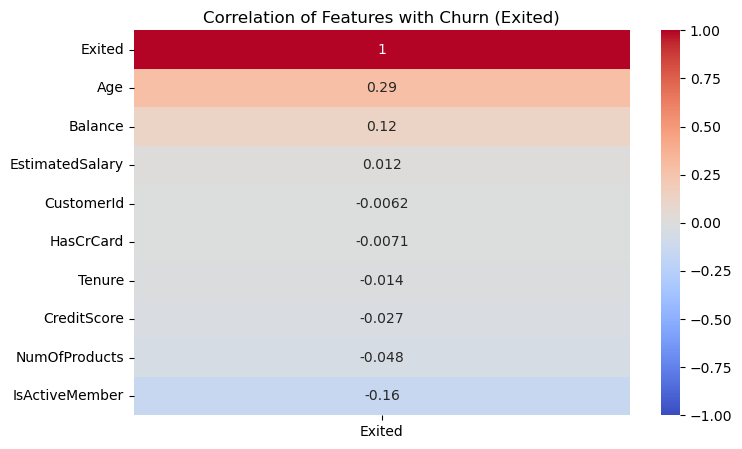

In [5]:
# Compute correlations
corr_matrix = churn.corr(numeric_only=True)

# Focus only on Exited correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[['Exited']].sort_values(by='Exited', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Churn (Exited)")
plt.show()

### **<u/>Findings:<u>** 

* It appears as though age (0.29) has the strongest positive correlation, indicating that older bank customers are more likely to churn
* Balance is our next significant (0.12) positive correlation, although it is a bit weaker it still indicates that higher balance customers may churn
* The exited variable demonstrates perfected correlation (1) as it is being compared with itself
* There are a few negative correlations with active memberships being the most significant (-0.16), implying that less active bank members may be more likely to churn

### **<u/>B: Box and Whisker Plots<u>**

* Apply box a whisker plots to highlight distribution patterns and outliers across non-churn and churn groups

C:\Users\dream\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


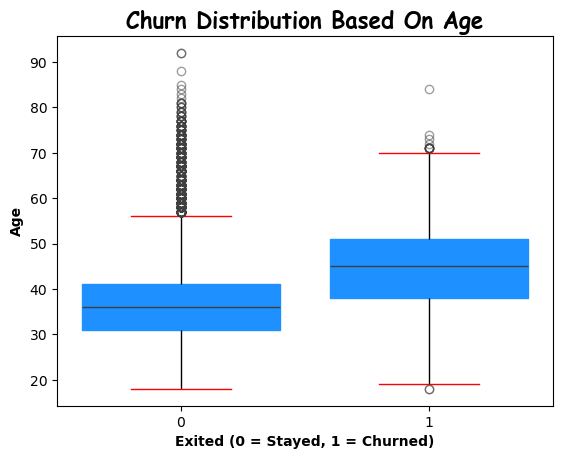

In [6]:
#Create a Seaborn boxplot to visualize the age distribution of churners and non-churners
sns.boxplot(x=churn["Exited"], y=churn["Age"],
           boxprops=dict(color='dodgerblue'),
            whiskerprops=dict(color="black"),  # Whisker color
            capprops=dict(color="red"),  # Caps color
            flierprops=dict(marker='o', color='yellow', alpha=0.5))  # Outliers

#Add descriptive labels for clarity
plt.title("Churn Distribution Based On Age", fontsize=16, fontweight='bold', fontfamily='cursive')
plt.xlabel("Exited (0 = Stayed, 1 = Churned)", fontweight='heavy')
plt.ylabel("Age", fontweight= 'heavy')
plt.show()

### **<u/>Findings:<u>**

* The median of age of churners (44) is greater than non-churners (37)
* The core age distribution of churners is greater than non-churners, although non-churners house more outliers
* Overall the box pot suggests that middle aged and older customers tend to churn moreso, which coincides with our heatmap findings above

C:\Users\dream\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


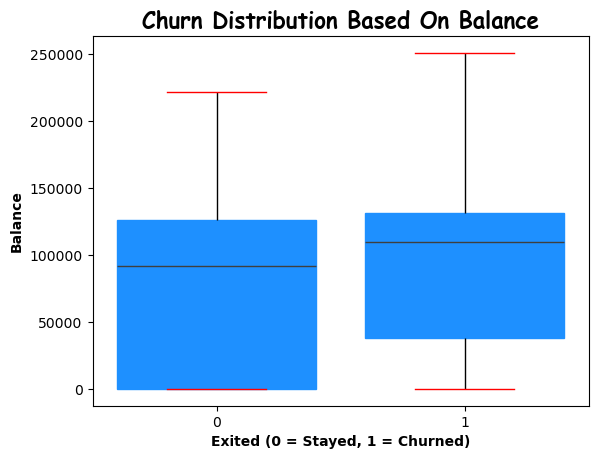

In [7]:
#Generate a boxplot of churners based on their account balance
sns.boxplot(x=churn["Exited"], y=churn["Balance"],
           boxprops=dict(color='dodgerblue'),
            whiskerprops=dict(color="black"),  # Whisker color
            capprops=dict(color="red"),  # Caps color
            flierprops=dict(marker='o', color='yellow', alpha=0.5))  # Outliers
            
#Add descriptive labels and titles
plt.title("Churn Distribution Based On Balance", fontsize=16, fontweight='bold', fontfamily='cursive')
plt.xlabel("Exited (0 = Stayed, 1 = Churned)", fontweight='heavy')
plt.ylabel("Balance", fontweight='heavy')
plt.show()

### **<u/>Findings:<u>**

* The median of balance of churners (130k) is greater than non-churners (90k) indicating that perhaps wealthly clientele churn more frequently 
* There is a greater balance distribution as well as percentile (25/50/75) and max values in churners, further reinforing the notion that individuals who churn are wealthier
* Ultimately the box plot suggests that the more balance an individual has in the bank, the more likely they are to churn

### **<u/>C: Bar Charts<u>**

* Utilize bar charts to examine **geography** and **gender** metrics of churners

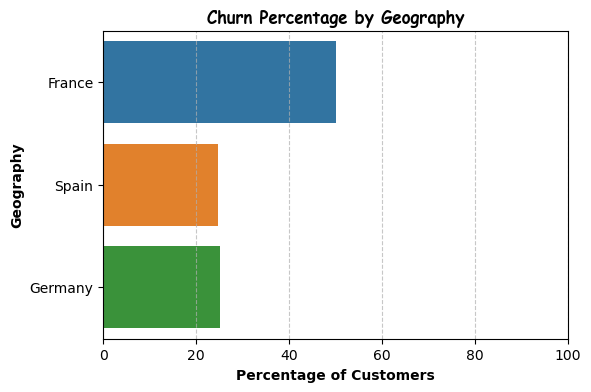

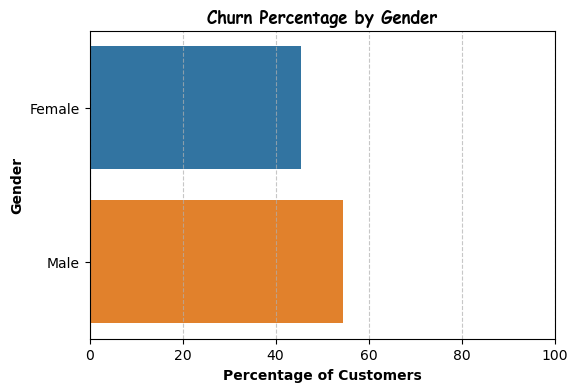

In [8]:
#Iterate though categorical variables (geography, gender) in the dataset
for col in churn.select_dtypes("object").columns[1:]:
    plt.figure(figsize=(6, 4))

    #Creates a bar chart displaying the percentage of churned customers by category
    sns.barplot(data=churn, x="Exited", y=col, estimator=lambda x: len(x) / len(churn) * 100, hue=col, palette='tab10')
    
    #Add descriptive labels and titles
    plt.title(f"Churn Percentage by {col}", fontsize=12, fontweight="bold", fontfamily='cursive')
    plt.ylabel(f"{col}", fontweight='heavy')
    plt.xlabel("Percentage of Customers", fontweight='heavy')

    #Set limit values and grid lines for better readability (percentage scale)
    plt.xlim(0,100)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()


### **<u/>Findings:<u>**

* With regards to geography, France (50%) appears to have the highest percentage of bank churners in this data set
* In terms of gender metrics males (58%) seem to churn moreso than females (43%)

## **<u/>Part 3: Prepare Data for Modeling<u>**

### *Objectives*:
* **A:** Remove irrelevant columns
* **B:** Apply feature engineering for predictive enhanements and explore
* **C:** Encode categorical variables for model compatibility
* **D:** Split data into training and testing sets

### **<u/>A: Remove Unnecessary Columns <u>**

In [9]:
#Remove irreleveant columns
churn_modelling_df = churn.drop(["CustomerId", "Surname"], axis=1)

### **<u/>B1: Feature Engineering (New Column Creation)<u>**

* Understand customer behavior based on financial balance and bank service engagement
* Identify potential churn patterns among customers with lower balance/income and salary/products ratios


In [10]:
#Create two new columns, balance_to_income ratio, and salary to number of products
churn_modelling_df = churn_modelling_df.assign(

    #Customer ratio of balance to salary indicating proportion of salary housed in bank
    balance_to_income = churn_modelling_df["Balance"] / churn_modelling_df["EstimatedSalary"],

    #Customer ratio of income to bank products used
    income_v_product = churn_modelling_df["EstimatedSalary"] / churn_modelling_df["NumOfProducts"]
)

churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


In [11]:
#Statistical exploration of reformated data 
churn_modelling_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703,74715.158001
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260,52058.899406
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,32589.780000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002,65908.002500
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022,100943.797500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440,199970.740000


### **<u/>Findings:<u>**

* The balance to income mean is 3.8 indicating that customers house 3.8 times their annual salary in the bank.
* The income product mean is 74k, indicating that for every 74 thousand dollars one bank service is used. This shows a general disengagement with such services with the ratio being so high per service.

### **<u/>B2: Explore (BoxPlot Analysis of New Columns)<u>**

C:\Users\dream\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='Exited', ylabel='balance_to_income'>

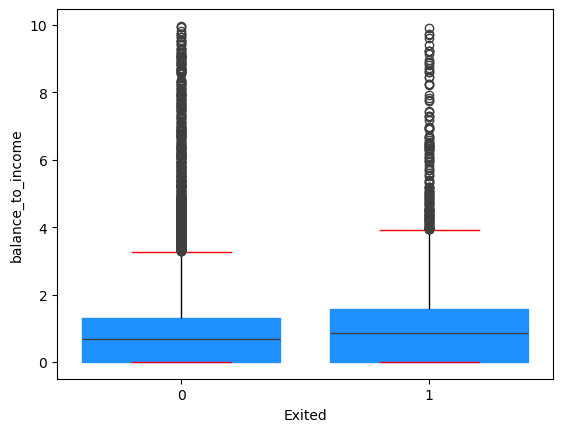

In [12]:
#Filter data to analyze customers with balance to income ratios below 10 to focus on individuals who may rely heavliy on bank services
sns.boxplot(churn_modelling_df.query("balance_to_income < 10"), x="Exited", y="balance_to_income",
           boxprops=dict(color='dodgerblue'),
            whiskerprops=dict(color="black"), 
            capprops=dict(color="red")) 

### **<u/>Findings:<u>**

* Both churners and non-churners have very similary balance to income distributions
* There is a prevalence out outliers within each group
* The similarity between the groups indicates that both groups have comparable financial features with regards to their balance and income relationship

C:\Users\dream\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='Exited', ylabel='income_v_product'>

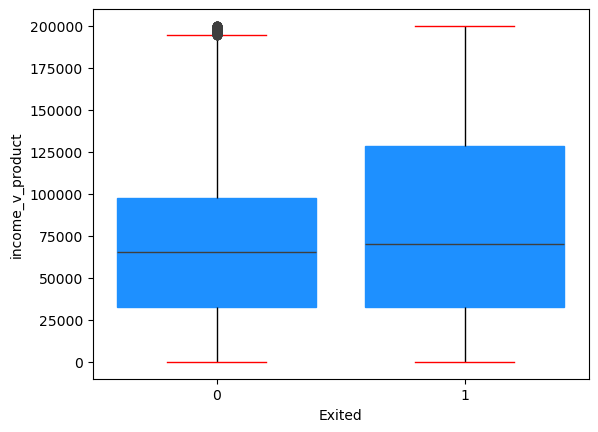

In [13]:
sns.boxplot(churn_modelling_df, x="Exited", y="income_v_product",
            boxprops=dict(color='dodgerblue'),
            whiskerprops=dict(color="black"), 
            capprops=dict(color="red")) 

### **<u/>Findings:<u>**

* Both churners and non-churners have very similar medians, with the greatest disparity in the 75th percentile region
* This indicates that wealthier clientele may be more prone to churning, reinforcing our previous findings further

### **<u/>C: Encode Categorical Variables to Numeric Format<u>**

In [14]:
#Convert categorical variables to numerical format utlizing one-hot encoding
#'get_dummies()' creates a binary indicator varaible, 'drop_first=True' removes a category form each feature avoiding multicollinearity
churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first=True, dtype="int")

#Display the transformed dataframe
churn_modelling_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0


### **<u/>D: Split Data for Modeling<u>**

* Seperate training (x) data from the target variable (y)
* Employ a standard 80/20 (train/test) split
* Explore x dataset structure to ensure numerical values

In [15]:
#Define feature matrix by exluding the target variable
X = churn_modelling_df.drop("Exited", axis=1)

#Define the target varialbe (churn status)
y = churn_modelling_df["Exited"]

#Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

#Explore the structure and data types of the x training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8276 to 7816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   balance_to_income  8000 non-null   float64
 9   income_v_product   8000 non-null   float64
 10  Geography_Germany  8000 non-null   int32  
 11  Geography_Spain    8000 non-null   int32  
 12  Gender_Male        8000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 781.2 KB


In [16]:
#Explore x test set
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 8374 to 8466
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   balance_to_income  2000 non-null   float64
 9   income_v_product   2000 non-null   float64
 10  Geography_Germany  2000 non-null   int32  
 11  Geography_Spain    2000 non-null   int32  
 12  Gender_Male        2000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 195.3 KB


## **<u/>Part 4: Logistic Regression<u>**

### *Objectives*:
* **A:** Model optimization, training and evaluation
* **B:** Feature impact analysis and visualization
* **C:** Calculate and visualize ROC curve for logistic regresson
* **D:** Precision-Recall curve for logistic model

### **<u/>A: Model optimization, training and evaluation <u>**

* Eliminate less irrelavent columns
* Fit and train the logistic regression model onto the training data
* Evaluate model performance though accuracy and classification report scores

In [17]:
#Optomize feature set by removing less relevant columns
X_train2 = X_train.drop(["Balance", "EstimatedSalary", "income_v_product"], axis=1)

In [18]:
#Employ 'newton-cholesky' solver for imporved model accuracy
logreg = LogisticRegression(solver="newton-cholesky")

#Fit the logisitic regression model to the training data
lr = logreg.fit(X_train, y_train)

#Evaluate model performance
print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817


In [44]:
#Import accuracy metric functions
from sklearn.metrics import classification_report

#Gather predictions on the X test data set
y_pred = lr.predict(X_test)

#Evaluate logistic model via classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1591
           1       0.62      0.22      0.32       409

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.77      2000



### **<u/>Findings:<u>**

* **Accuracy:** The model accurately predicts churn and non-churn cases 81% of the time
* **Precision:** When predicting non-churners the model is 83% accurate, however when predicting churners it is 62% accurate indicating existence of false positives
* **Recall:** The model is 97% accurate in identifying all non-churners, but only 22% accurate when detecting churners providing further evidence of false poisitives
* **F1-score:** non-churners are well predicted (89%), however churners are not once again (32%)
* Ultimately the model appears to be strong when identifying non-churners versus churners, which is most likely due to an imbalance in the dataset where non-churners are more prevalent 

### **<u/>B: Feature impact analysis and visualization <u>**

* Exponentiate log odds to ratio odds for ease of interpretation
* Visualized transformed odds for greater impact

In [46]:
#Convert logistic regression coefficients to odds ratios (exponentiation)
odds_ratios = np.exp(lr.coef_[0])

#Create a structured dataframe for better readability
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Odds Ratio': odds_ratios})
coef_df.sort_values(by="Odds Ratio", ascending=False, inplace=True)  # Sort by impact

#Display the results
print(coef_df)

              Feature  Odds Ratio
4       NumOfProducts    2.222623
10  Geography_Germany    2.215712
1                 Age    1.076254
11    Geography_Spain    1.036151
8   balance_to_income    1.000575
9    income_v_product    1.000022
3             Balance    1.000002
7     EstimatedSalary    0.999983
0         CreditScore    0.999082
2              Tenure    0.984400
5           HasCrCard    0.889230
12        Gender_Male    0.606947
6      IsActiveMember    0.339703


C:\Users\dream\AppData\Local\Temp\ipykernel_7464\4134153392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Odds Ratio", y="Feature", palette="coolwarm")


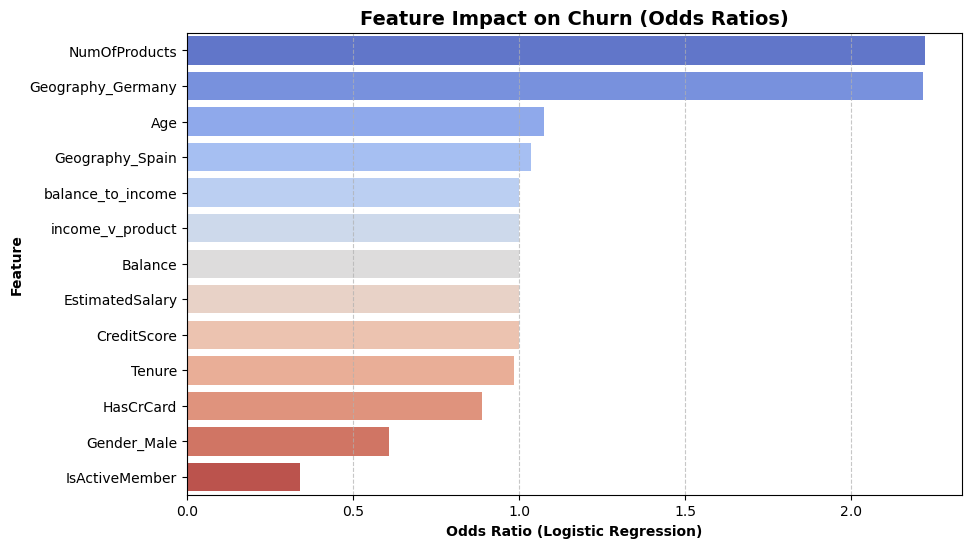

In [47]:
#Generate bar plot for odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Odds Ratio", y="Feature", palette="coolwarm")

#Add descriptive labels and titles
plt.title("Feature Impact on Churn (Odds Ratios)", fontsize=14, fontweight="bold")
plt.xlabel("Odds Ratio (Logistic Regression)", fontweight="bold")
plt.ylabel("Feature", fontweight="bold")

#Display grid for readability
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### **<u/>Findings:<u>**

* **NumOfProducts (2.22):** It appears this is the largest driver of churn, as customers are twice as likely to churn with an increase of products. This could indicate that the products offered overwhelm the customer through product satruation as well as providing low to no added value
* **Georgraphy_Germany(2.21):** Bank region seems to play a large role in churn, where German's as twice as likely to leave the institution
* **Gender_Male(0.61):** Although men churners are more prevalent in the dataset, they are actually 39% less likely to churn than females
* **IsActiveMember(0.34):** Active customers are 66% less likely to churn, indicating that customer engagment and interaction are crucial for retention

### **<u/>C: Calculate and visualize ROC curve for logistic regresson<u>**

* Assess how well the model identifies churners (1) and non-churners (0)
* Measure performance of area under the curve (AUC)

In [48]:
#Import ROC/AUC functions
from sklearn.metrics import roc_curve, auc

#Predicts probabilities that class 1 (churned customers)
y_probs = lr.predict_proba(X_test)[:,1]

#Calculate false positive rate (fpr) and true positive rate (tpr) as well as threshold
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs) #Reciver operating characteristic (ROC)

#Calculate area under the curve score (higher AUC curve = better class seperation)
auc_score = auc(fpr1, tpr1)

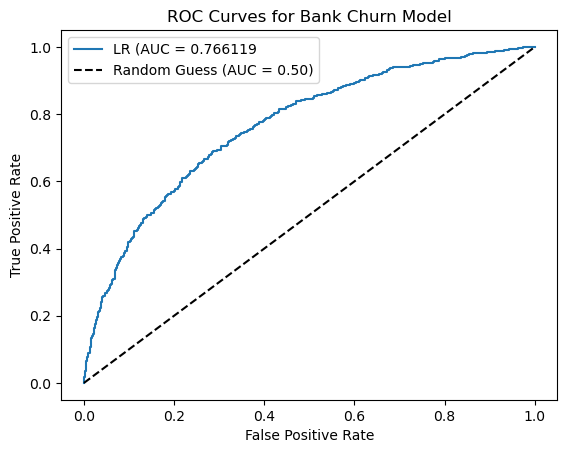

In [31]:
#Plot ROC curve 
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:2f}')

#Add a baseline (random guess) for reference
plt.plot([0,1], [0,1], 'k--', label='Random Guess (AUC = 0.50)')

#Add descriptive labels and titles
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show()

### **<u/>Findings:<u>**

* **AUC score(0.766%):** Indicates that the model is 76.6% accurate in correctly seperating churners from non-churners
* The model performs signicantly better than that of a random guess, however, as discorvered previously struggles with the identifcation of churners

### **<u/>D: Precision-Recall curve for logistic model<u>**

* Evaluate model performance across various probabilty thresholds
* Assess the balance between precision (avoiding false positives) and recall (minimizing false negatives(

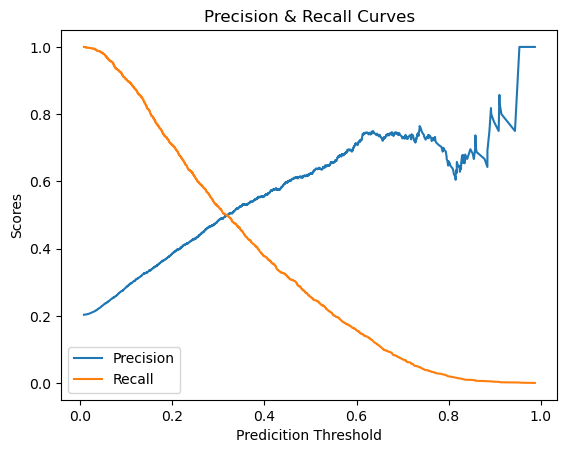

In [32]:
#Import recall curve funtion
from sklearn.metrics import precision_recall_curve

#Calculate precision and recall scores at different classification thresholds
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

#Add descriptive labels
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Predicition Threshold')
plt.ylabel('Scores')
plt.title('Precision & Recall Curves')
plt.legend()
plt.show()

### **<u/>Findings:<u>**

* **Precision:** The increase as the prediction threshold rises indicates fewer false positives, but increased missed churners (lower recall)
* **Recall:** Descreases with a higher threshold, indicating fewer missed churners, but greater false positives

# **Final Conclusion:**

**1. Exploratory Data Analysis (EDA) Takeaways:**
* Initial statistical exploration revealed **age** and **balance** as key customer churn metrics
* These early findings suggested that financial behavior and demographic factors may significantly influence churn rates

**2. Logistic Regression Model Implementation:**
* A **logistic regression model** was utilized to predict churn using a range of relevant features.
* Results conveyed that the **number of bank products**, **location (region)**, **gender**, and **active membership** had the greatest impact on churn probability

**3. Challenges with Class Imbalance:**
* Evaluation metrics highlighted a significant class imbalance between churners and non-churners
* The prevalence of non-churners caused the model to more accurately identify them versus their churner counterparts

**4. Potential Improvements:**
* Hyperparameter tuning with the use of a randomized grid search could improve model accuracy through the optimization of key parameters
* Employing more sophisticated models like Random Forrest or Gradient Boosting may improve predictive performance by capturing nonlinear relationships in churn behavior